In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn import tree
import time
from numpy import argmax
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Correct paths
weather_data_path = '/Users/andrewfearney27/Downloads/df_cleaned.csv'
pleasant_weather_path = '/Users/andrewfearney27/Downloads/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'

# Load the datasets
weather_data = pd.read_csv(weather_data_path)
pleasant_weather = pd.read_csv(pleasant_weather_path)

In [18]:
# Data Wrangling

# Step 1: Create a list of columns that don't include 'DUSSELDORF'
# We do this by iterating over all column names and keeping only those 
# that do not contain 'DUSSELDORF' in their name.

keep = [x for x in weather_data.columns if not x.find('DUSSELDORF') >= 0]

In [19]:
# Sorting the list of columns to keep, just to ensure it's organized
keep.sort()

# Print out the columns that are being kept, this helps with debugging and understanding 
# which data you're working with
print("Columns being kept:", keep)

Columns being kept: ['BASEL_cloud_cover', 'BASEL_global_radiation', 'BASEL_humidity', 'BASEL_precipitation', 'BASEL_pressure', 'BASEL_sunshine', 'BASEL_temp_max', 'BASEL_temp_mean', 'BASEL_temp_min', 'BELGRADE_cloud_cover', 'BELGRADE_global_radiation', 'BELGRADE_humidity', 'BELGRADE_precipitation', 'BELGRADE_pressure', 'BELGRADE_sunshine', 'BELGRADE_temp_max', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BUDAPEST_cloud_cover', 'BUDAPEST_global_radiation', 'BUDAPEST_humidity', 'BUDAPEST_precipitation', 'BUDAPEST_pressure', 'BUDAPEST_sunshine', 'BUDAPEST_temp_max', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'DEBILT_cloud_cover', 'DEBILT_global_radiation', 'DEBILT_humidity', 'DEBILT_precipitation', 'DEBILT_pressure', 'DEBILT_sunshine', 'DEBILT_temp_max', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'HEATHROW_cloud_cover', 'HEATHROW_global_radiation', 'HEATHROW_humidity', 'HEATHROW_precipitation', 'HEATHROW_pressure', 'HEATHROW_sunshine', 'HEATHROW_temp_max', 'HEATHROW_temp_mean', 'HEATHROW_temp_

In [20]:
# Step 2: Create an 'X' matrix by dropping the unneeded columns
# The unneeded columns here are the ones that include 'DUSSELDORF' in their name.
X2 = weather_data.drop(keep, axis=1)

# The 'y2' vector is the target variable, here we are keeping only the 
# 'DUSSELDORF_pleasant_weather' column from the pleasant_weather DataFrame
y2 = pleasant_weather['DUSSELDORF_pleasant_weather']

# Checking the shape of the resulting X2 and y2 to ensure everything is correct
print(X2.shape)
print(y2.shape)

# Step 3: Turning X2 and y2 from a DataFrame to NumPy arrays (X and y)
X = np.array(X2)
y = np.array(y2)

# Verifying the shapes of X and y arrays to ensure they match the expected format
print(X.shape)
print(y.shape)

# Step 4: Split the data into training and testing sets
# We use an 80-20 split, where 20% of the data is reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

# Checking the shapes of the training and testing sets to ensure everything split correctly
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22950, 9)
(22950,)
(22950, 9)
(22950,)
(18360, 9) (18360,)
(4590, 9) (4590,)


In [23]:
# Creating a Random Forest classifier
clf = RandomForestClassifier()

# Grid Search CV
grid_space = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]  # Ensure these are valid integer values
}

start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes ' % ((time.time() - start)/60))

# Grid search results
print('Best GRID search hyperparameters are: ' + str(model_grid.best_params_))
print('Best GRID search score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.946 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.957 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.963 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.953 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.961 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.997 total time=   0.8s
[CV 1/

In [24]:
# Random Search CV
rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(10, 500, step=50),
    'max_features': randint(1, 7),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4),
    'min_samples_split': np.arange(2, 10, step=2)
}

start = time.time()
rf_random = RandomizedSearchCV(clf, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes ' % ((time.time() - start)/60))

# Random search results
print('Best RANDOM search hyperparameters are: ' + str(model_random.best_params_))
print('Best RANDOM search score is: ' + str(model_random.best_score_))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.956 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.948 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.952 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.954 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.934 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.969 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.958 total time=   0.3s
[CV 3/3]

Model Accuracy:  1.0


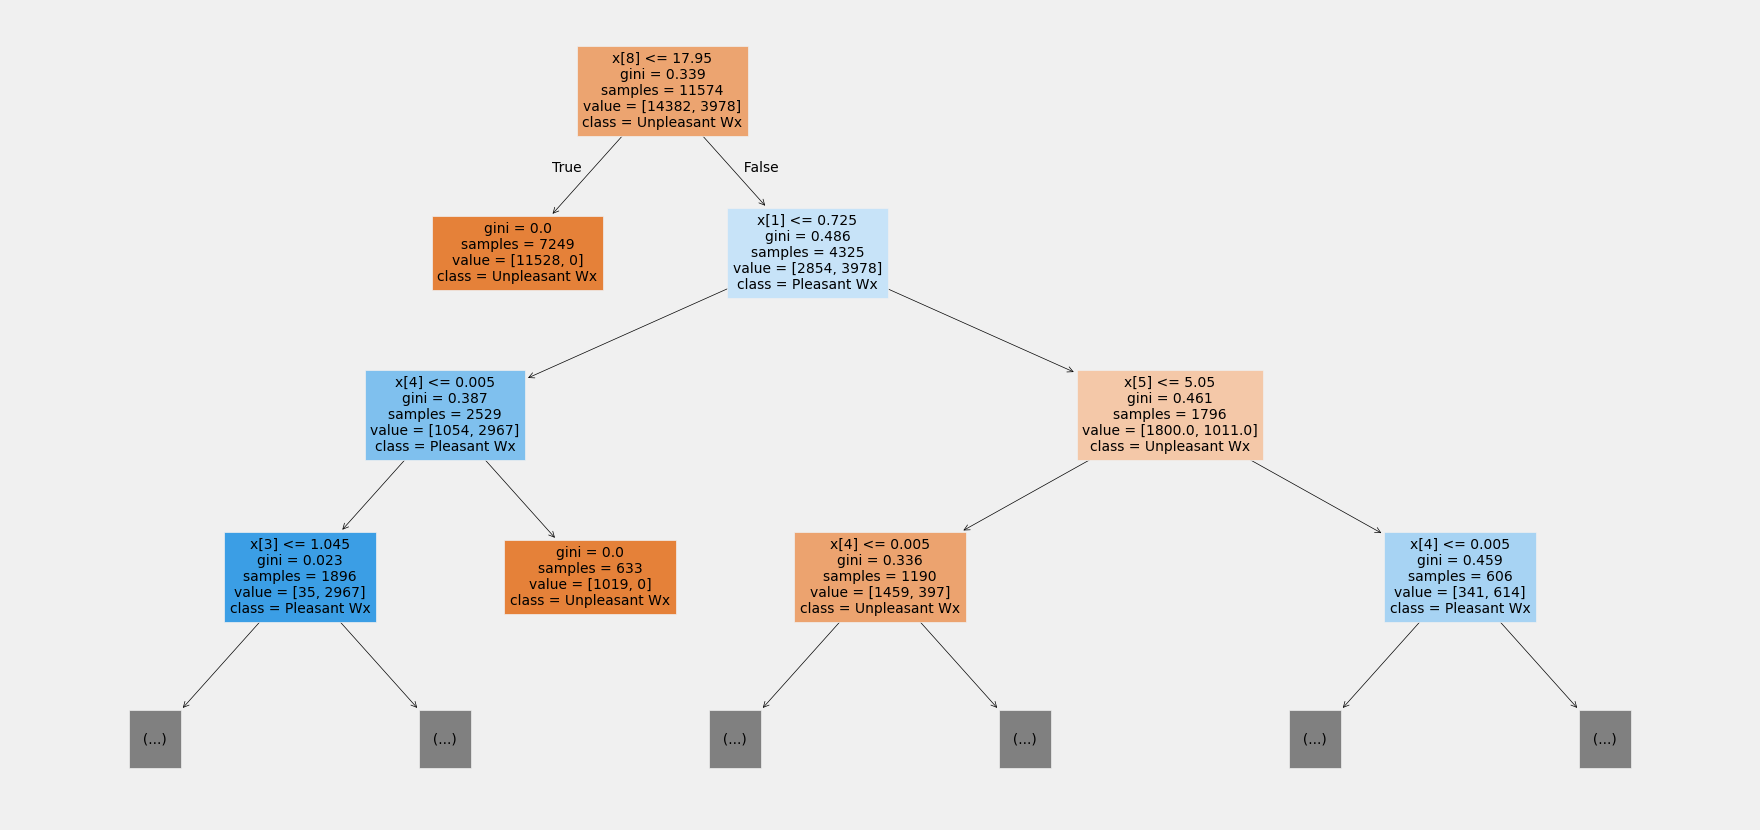

In [33]:
# Creating a Random Forest classifier with limited tree depth
clf = RandomForestClassifier(criterion='gini', max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=160)

# Training the model on the training dataset
clf.fit(X_train, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test)

# Using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Define the class names
types = {0: 'Unpleasant Wx', 1: 'Pleasant Wx'}

# Visualizing a decision tree with limited depth
fig = plt.figure(figsize=(20, 10))  # You can adjust figsize as needed
plot_tree(clf.estimators_[5], max_depth=3, fontsize=10, class_names=types, filled=True)
plt.show()



[0.03391595 0.00283769 0.0034252  0.04840694 0.4128256  0.06583584
 0.1112722  0.00114397 0.32033661]
['DUSSELDORF_cloud_cover', 'DUSSELDORF_global_radiation', 'DUSSELDORF_humidity', 'DUSSELDORF_precipitation', 'DUSSELDORF_pressure', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_max', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min']


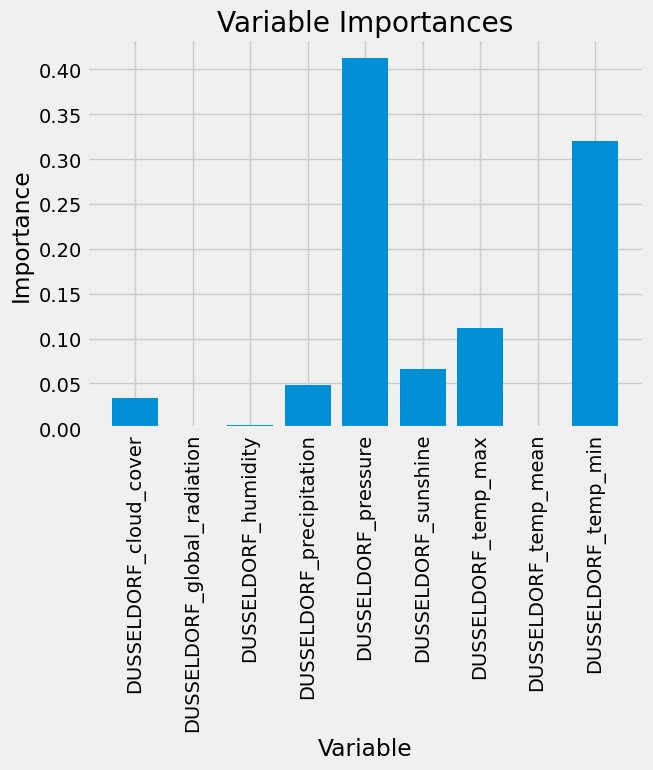

In [32]:
# Relative importance of Factors
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(newarray)

# Setting a threshold for printing options
np.set_printoptions(threshold=1000)

# Create a list of features used in the X2 matrix (assuming X2 was your feature matrix after dropping unwanted columns)
station1 = list(X2.columns)
station1.sort()
print(station1)

# Creating a pandas Series for easier plotting
newarray = pd.Series(newarray, index=station1)

# Plotting the variable importance
plt.style.use('fivethirtyeight')
x_values = list(range(len(newarray)))
plt.bar(x_values, newarray, orientation='vertical')
plt.xticks(x_values, station1, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()
